# Data Setup Notebook
## 1) Adult Dataset

In [44]:
# Step 1: Get the original data from the UCI repository
from ucimlrepo import fetch_ucirepo 
  
adult = fetch_ucirepo(id=2) 
  
X = adult.data.features 
y = adult.data.targets 

In [45]:
# Step 2: Basic Summary Statistics
import pandas as pd
import numpy as np

# Convert the data to a pandas DataFrame
adult_df = pd.DataFrame(X, columns=adult.data.feature_names)
adult_df['income'] = y

# Summary statistics
print(adult_df.head())
print(adult_df.describe())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

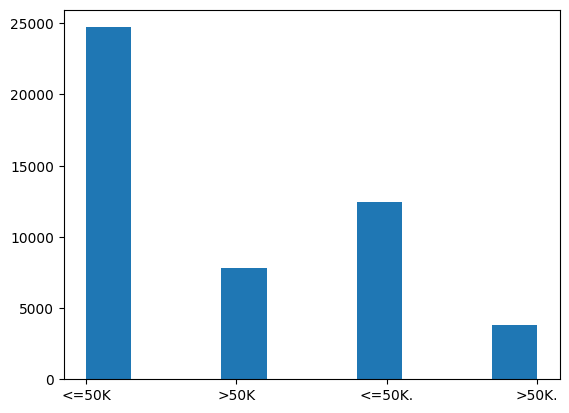

In [46]:
# Step 3: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable (which is categorical)
plt.hist(adult_df['income'])
plt.show()

In [47]:
# Step 4: Cleaning target variable by replacing "<=50K." with "<=50K" and ">50K." with ">50K"
adult_df['income'] = adult_df['income'].replace("<=50K.", "<=50K")
adult_df['income'] = adult_df['income'].replace(">50K.", ">50K")

# Show sum of each value in the target variable
print(adult_df['income'].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [48]:
# Step 5: Remove all rows with NA values
missing = adult_df.isnull().sum()
missing = missing[missing > 0]
print(missing)

print(adult_df.shape)
adult_df = adult_df.dropna()
print(adult_df.shape)

missing = adult_df.isnull().sum()
missing = missing[missing > 0]
print(missing)

workclass         963
occupation        966
native-country    274
dtype: int64
(48842, 15)
(47621, 15)
Series([], dtype: int64)
